


This is a PBL Project.

We have written a code for result analysis of FE department UT marks of SEM-II

Choices : - 

    1. Choose 1 if you want the data of whole division, along with the topper of that particular division
    2. Choose 2 if you want the data of particular student






Enter Your Choice :-  2
Enter roll no of student :-  1545



-----------------------------------------
  !   FE DEPARTMENT STUDENT RESULT    !  
----------------------------------------- 
╒═════════════════╤══════════════════════╕
│                 │ 1545                 │
╞═════════════════╪══════════════════════╡
│ Name of Student │ SHINDE ANURAG KALYAN │
├─────────────────┼──────────────────────┤
│ EM -II          │ 26.0                 │
├─────────────────┼──────────────────────┤
│ EP              │ 1                    │
├─────────────────┼──────────────────────┤
│ BEE             │ 8                    │
├─────────────────┼──────────────────────┤
│ PPS             │ 10                   │
├─────────────────┼──────────────────────┤
│ EG              │ 6                    │
├─────────────────┼──────────────────────┤
│ TOTAL MARKS     │ 51                   │
╘═════════════════╧══════════════════════╛


RESULT:
-------
Fail




Do you want to continue?? 
 (1.YES / 2.NO) :-  1


--------------------------------------------




Enter Your Choice :-  1
Enter Division :- FE  6


====  ==========  =============================  ========  ====  =====  =====  ====  =============
  ..    Roll No.  Name of Student                  EM -II    EP    BEE    PPS    EG    TOTAL MARKS
====  ==========  =============================  ========  ====  =====  =====  ====  =============
   0        1601  WAGHOLE GAURAV KAILAS                16    14     12      0     5             47
   1        1602  WAHADANE TEJAL SANDIP                24    21     25     16    14            100
   2        1603  YADAV ADITYA AVINASH                 28    16     24     12     8             88
   3        1604  ZASKAR YASH SANTOSH                  24    22     26      9     7             88
   4        1605  CHAUDHARI AISHWARYA SUNIL            17    19     15     13     7             71
   5        1606  GAJARE SWARANJALI MARUTI             23    16     23     12     8             82
   6        1607  GAT ATHARVA ANIL                     26    26     25     17    10            104
   7      

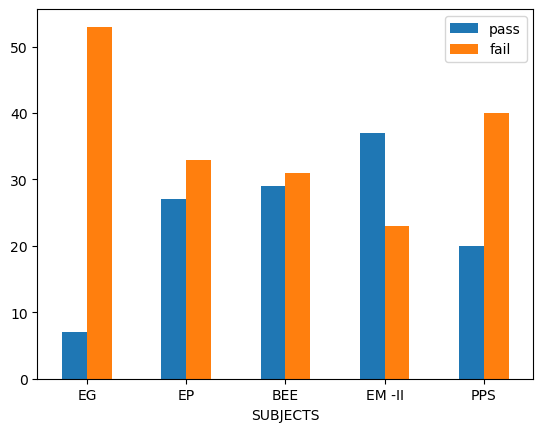

Do you want to continue?? 
 (1.YES / 2.NO) :-  2


--------------------------------------------


In [1]:
# Importing required libraries
from tabulate import tabulate
import pandas as pd
import openpyxl
import matplotlib.pyplot as plt
import numpy as np
cutoff=12
print()
print()
print()

#INTRODUCTION TO THE PROJECT
print("""This is a PBL Project.

We have written a code for result analysis of FE department UT marks of SEM-II

Choices : - 

    1. Choose 1 if you want the data of whole division, along with the topper of that particular division
    2. Choose 2 if you want the data of particular student""")
print()
print()
ch = 1
while (ch == 1):

    print()
    print()
    r = int(input("Enter Your Choice :- ")) 
    
    #DIVISION WISE RESULT
    if r == 1:
        
        i = int(input("Enter Division :- FE "))
        #Creating a DataFrame from Excel sheet
        df1 = pd.read_excel(
            r"C:\Users\nites\Downloads\Unit Test-1 marks entry sheet.xlsx", sheet_name=i-1)
        
        data = pd.DataFrame(df1)

        #printing division result
        print(tabulate(data, headers='keys', tablefmt='rst'))
        print()
        
        #Result of topper of particular division
        print(f"Topper of FE{i} is :- ")
        print()
        maxmarks = data['TOTAL MARKS'].max()
        # print(maxmarks)
        student_result = data.loc[data['TOTAL MARKS'] == maxmarks]
        topper = pd.DataFrame(student_result)
        print(tabulate(topper, headers='keys', tablefmt='rst'))
        print()

        
        #GRAPHICAL VISUALIZATION
        if i <=3:

            subjects = ['EG', 'EC', 'BXE', 'EM -II', 'EM'] #for div 1 to 3
        else:
            subjects = ['EG', 'EP', 'BEE', 'EM -II', 'PPS'] #for div 4 to 6
        
        list_fail = []
        list_pass = []
        
        for i in range(5):

            fail = 0
            Pass = 0
            for j in range(len(df1)):
                marks = df1._get_value(j, subjects[i])
                if (marks) < (cutoff):                   
                    (fail) += 1
                else:
                    (Pass) += 1

            list_fail.append(fail)
            list_pass.append(Pass)

        marks_dict = {
            'SUBJECTS': subjects,
            'pass': list_pass,
            'fail': list_fail

        }

        # Subjectwise pass/fail 

        print(f"Subjectwise Result Analysis of FE{i} :")
        print()
        data_marks = pd.DataFrame(marks_dict)
        print(tabulate(data_marks, headers='keys', tablefmt='rst'))
        
        
        #plotting the division result
        data_marks.plot.bar(x='SUBJECTS', rot=0)
        plt.show()

    
    
    
    # FOR INDIVIDUAL STUDENT
    
    elif r == 2:
        roll = input("Enter roll no of student :- ")
        div = int(roll[1])
        
        #for individual student between division 1 to 3
        if div < 4:
            
            #seperate dataframe for div 1-3
            df1 = pd.read_excel(
                r"C:\Users\nites\Downloads\Unit Test-1 marks entry sheet.xlsx", sheet_name=6)
            
            data = pd.DataFrame(df1) #converting to dataframe
            data = data.set_index('Roll No.') # assigning the index
            subjects = ['EG', 'EC', 'BXE', 'EM -II', 'EM']
            student_result = data.loc[int(roll)]#individual result as per roll no.

            #Accessing particular subject marks
            eg = student_result['EG']
            chem = student_result['EC']
            bxe = student_result['BXE']
            em_2 = student_result['EM -II']
            em = student_result['EM']
            total = student_result['TOTAL MARKS']

            #assigning marks to seperate variables
            EG = eg
            EM2 = em_2
            CHEM = chem
            BXE = bxe
            EM = em
            TOTAL = total
            
            
            #DataFrame of individual student
            sr = pd.DataFrame(student_result)
            
            #printing the individual students result
            print()
            print("-----------------------------------------")
            print("  !   FE DEPARTMENT STUDENT RESULT    !  ")
            print("----------------------------------------- ")
            print(tabulate(sr, headers='keys', tablefmt='fancy_grid')) #tabulating the result
            print()
            print()
            print("RESULT:")
            print("-------")

            m = [EG, EM2, CHEM, BXE, EM]
            for i in range(5):
                if m[i] < 12:
                    print("Fail")
                    break
            else:
                # print(TOTAL)
                print("Congratulations !!!")
                print("You are passed with a total of ", TOTAL)
        
        

        else:

            #For division 4 to 6

            #seperate dataframe for 4 to 6
            df1 = pd.read_excel(r"C:\Users\nites\Downloads\Unit Test-1 marks entry sheet.xlsx", sheet_name=7)
            data = pd.DataFrame(df1)
            data = data.set_index('Roll No.')
            subjects = ['EG', 'EP', 'BEE', 'EM -II', 'PPS']
            student_result = data.loc[int(roll)]

            #accessing particular subject marks
            eg = student_result['EG']
            phy = student_result['EP']
            bee = student_result['BEE']
            em_2 = student_result['EM -II']
            pps = student_result['PPS']
            total = student_result['TOTAL MARKS']

            #assigning marks to variables
            EG = eg
            EM2 = em_2
            PHY = phy
            BEE = bee
            PPS = pps
            TOTAL = total
            
            #seperate dataframe for individual student
            sr = pd.DataFrame(student_result)
        
            #printing result
            print()
            print("-----------------------------------------")
            print("  !   FE DEPARTMENT STUDENT RESULT    !  ")
            print("----------------------------------------- ")
            print(tabulate(sr, headers='keys', tablefmt="fancy_grid")) #tabulating the result
            print()
            print()
            print("RESULT:")
            print("-------")

            m = [EG, EM2, PHY, BEE, PPS]
            for i in range(5):
                if m[i] < 12:
                    print("Fail")
                    break
            else:
                # print(TOTAL)
                print("Congratulations !!!")
                print("You are passed with a total of ", TOTAL)
    
    
    #raised an error for choice other than 1 and 2 
    else:
        print("Invalid input")
    
    print()
    print()
    #1 for continue the execution of code 
    #2 for stopping the execution of code
    ch = int(input("Do you want to continue?? \n (1.YES / 2.NO) :- "))
    print("--------------------------------------------")